In [42]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm 
import matplotlib.pyplot as plt


import numpy as np

# iris = load_iris()
# data = iris.data
# target = iris.target


# def graph(data, target, kn):
#     x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
#     y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

#     kn.fit(data, target)

#     z = kn.predict(np.c_[xx.ravel(), yy.ravel()])

#     z = z.reshape(xx.shape)
        
#     plt.pcolormesh(xx, yy, z)
#     plt.scatter(data[:,0][target == 0], data[:,1][target == 0], marker='+')
#     plt.scatter(data[:,0][target == 1], data[:,1][target == 1], marker='+')
#     plt.scatter(data[:,0][target == 2], data[:,1][target == 2], marker='+')
#     plt.show()
    
# dtr, dts, ttr, tts = train_test_split(data, target)

# sc = SVC(kernel='linear')
# sc.fit(dtr, ttr)


# accuracy_score(tts, sc.predict(dts))


df = pd.read_csv('voice.csv')
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


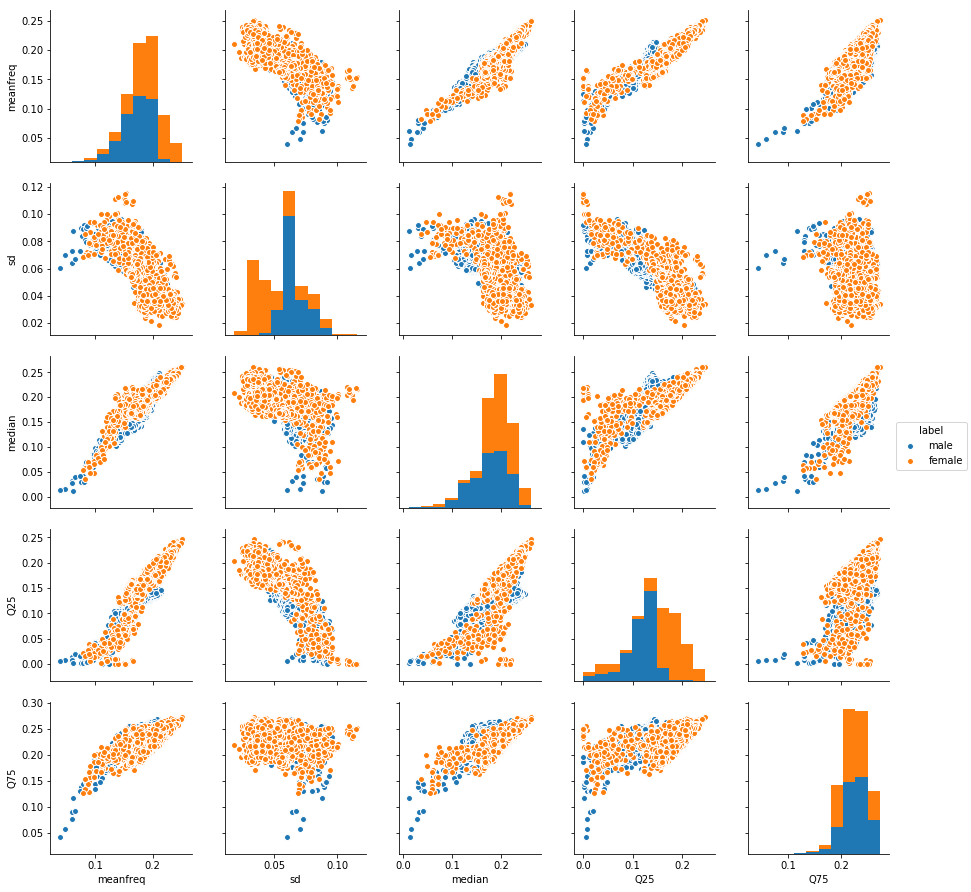

In [12]:
sns.pairplot(df[list(df.columns[:5]) + ['label']], hue='label')

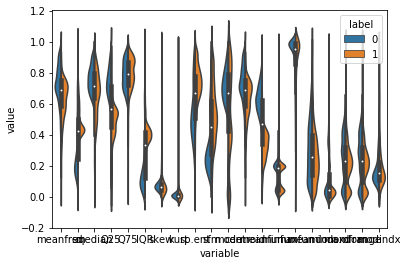

In [25]:



df1 = df.drop('label', axis=1)
MinMaxScaler().fit_transform(df1)
df1 = pd.DataFrame(MinMaxScaler().fit_transform(df1), columns=df.columns[:-1])

df1['label'] = df.label
df1.label = LabelEncoder().fit_transform(df1.label)
df1.head()

sns.violinplot(x='variable', y='value', hue='label', data=df1.melt(id_vars='label'), split=True)

In [41]:
data = df1.drop('label', axis=1)
target = df1.label

def get_accuracy(cl):
    dtr, dts, ttr, tts = train_test_split(data, target)
    cl.fit(dtr, ttr)
    return accuracy_score(tts, cl.predict(dts))

get_accuracy(SVC(kernel='rbf'))


# data.head()

0.9671717171717171

In [43]:
get_accuracy(RandomForestClassifier())

0.9797979797979798

In [44]:
from sklearn.tree import DecisionTreeClassifier

get_accuracy(DecisionTreeClassifier())

0.9532828282828283

In [46]:
for C in (1, 10, 100, 1000):
    a = get_accuracy(SVC(kernel='linear', C=C))
    print(a)

0.9671717171717171
0.9797979797979798
0.9797979797979798
0.9696969696969697


In [47]:
for C in (1, 10, 100, 1000):
    a = get_accuracy(SVC(kernel='rbf', C=C))
    print(a)

0.9747474747474747
0.976010101010101
0.9734848484848485
0.9772727272727273


In [48]:
for C in (90, 100, 110, 120):
    a = get_accuracy(SVC(kernel='rbf', C=C))
    print(a)

0.9722222222222222
0.9785353535353535
0.9810606060606061
0.9747474747474747


In [52]:
data = data[['sd', 'Q25', 'IQR', 'sp.ent', 'mode', 'meanfun']]

for C in (90, 100, 110, 120):
    a = get_accuracy(SVC(kernel='rbf', C=C))
    print(a)
# sns.violinplot(x='variable', y='value', hue='label', data=df1.melt(id_vars='label'), split=True)

0.9696969696969697
0.9747474747474747
0.9696969696969697
0.9659090909090909
